In [3]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
train_df = pd.read_csv("./titanic/train.csv")   ## TITANIC DATASET KAGGLE
test_df = pd.read_csv("./titanic/test.csv")

In [5]:
#combine = pd.concat([train_df, test_df],axis = 0)
#combine.head()

In [6]:
combine = [train_df, test_df]

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [10]:
train_df.dtypes
print('_'*40)
test_df.dtypes

________________________________________


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
categorical = train_df.dtypes[train_df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

In [14]:
train_df.describe(include=['O']) #only categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lang, Mr. Fang",male,347082,G6,S
freq,1,577,7,4,644


In [15]:
#from above
#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)

## numerical, ordinal

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
#train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

In [19]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


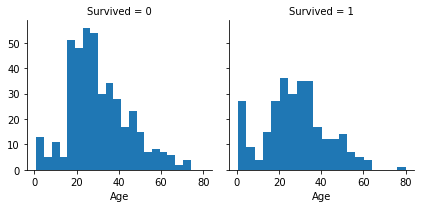

In [22]:
g = sns.FacetGrid(train_df, col = 'Survived')     ## ORdinal
g.map(plt.hist, 'Age', bins = 20)

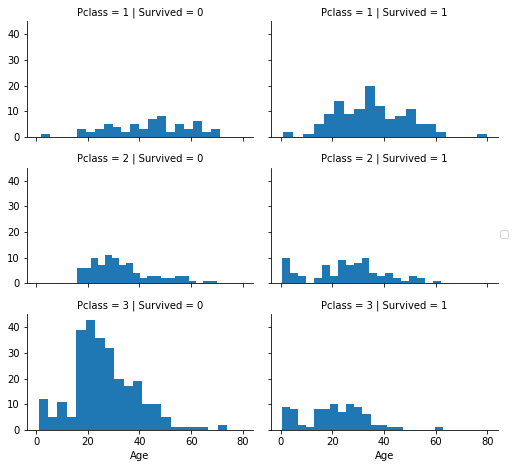

In [23]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()

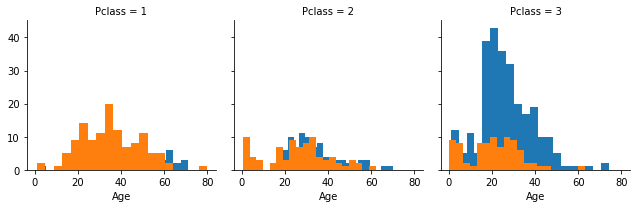

In [24]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')   ## oR
grid.map(plt.hist, 'Age', bins = 20)

In [25]:
## categorical

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


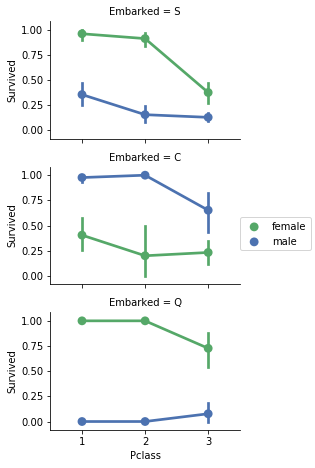

In [26]:
grid = sns.FacetGrid(train_df, row = 'Embarked',size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [27]:
#correlation

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


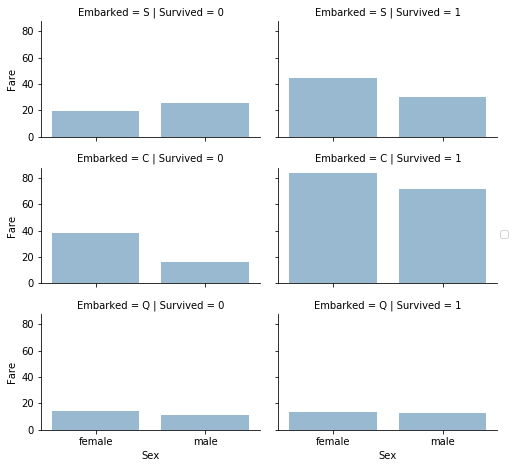

In [28]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


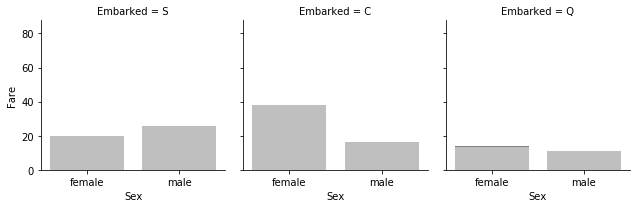

In [29]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})  # Wrong !!!
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)

In [30]:
#data wrangling

In [31]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)#combine[0] is train set,combine[1] is test set

train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)           #combine is a list
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 12) (418, 11)


In [32]:
# creating new feature

In [33]:
# The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. 
# The expand=False flag returns a DataFrame.

In [34]:
for dataset in combine: #combine is a list, iterable
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
#pd.crosstab(train_df['Title'], train_df['Sex'])  #traind_df doesnot have 'Title' column, iteration has taken place in -- combine
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
#dataset.head()  #it has gone to test

In [36]:
#pd.crosstab(dataset['Title'], dataset['Sex'])

In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [38]:
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [39]:
combine[0][['Title', 'Survived']].groupby(['Title'], as_index = False).mean()  #combine[0] is train

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [40]:
title_mapping = {'Mr' :1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
combine[0].head()    #train set  #by mistake combine still has cabin and ticket, remove them
#train_df.head() #nochanges

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [41]:
train_df= combine[0].copy()  #combine stil has cabin and ticket, remove them
test_df= combine[1].copy()

In [42]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3


In [43]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3


In [44]:
train_df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [45]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3


In [46]:
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [47]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [48]:
#Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

#We can consider three methods to complete a numerical continuous feature.

#A simple way is to generate random numbers between mean and standard deviation.

#More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, 
#Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
#So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

#Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard 
#deviation, based on sets of Pclass and Gender combinations.

#Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer 
#method 2.

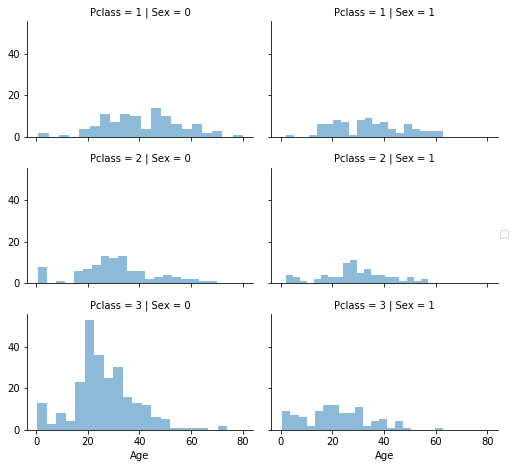

In [49]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col ='Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [50]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [51]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [52]:
#Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations

In [53]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()  ## dist fill
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            guess_ages[i,j] =int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] =  dataset['Age'].astype(int)

In [54]:
guess_df.head()

1     47.0
4     22.0
6     30.0
8     18.0
18    27.0
Name: Age, dtype: float64

In [55]:
age_guess

22.0

In [56]:
guess_ages

array([[42., 28., 24.],
       [41., 24., 22.]])

In [57]:
dataset.Age.isnull().any()

False

In [58]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34,0,0,7.8292,Q,1
1,3,1,47,1,0,7.0000,S,3
2,2,0,62,0,0,9.6875,Q,1
3,3,0,27,0,0,8.6625,S,1
4,3,1,22,1,1,12.2875,S,3


In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [60]:
#Let us create Age bands and determine correlations with Survived.

In [61]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [63]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [64]:
# Let us replace Age with ordinals based on these bands

In [65]:
for dataset in combine:
    dataset.loc[dataset.Age <= 16, 'Age' ] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age' ] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age' ] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age' ] = 3
    dataset.loc[(dataset.Age > 64) & (dataset.Age <= 80), 'Age' ] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [66]:
train_df.Age.isnull().any()

False

In [67]:
train_df = train_df.drop(['AgeBand'], axis =1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [68]:
train_df1 = train_df.copy()

In [69]:
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [70]:
combine1 = [train_df1, test_df]

In [71]:
# Create new feature combining existing features
# We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp 
# from our datasets.

In [72]:
for dataset in combine1:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df1.head()
train_df1[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

,FamilySize,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


In [73]:
#We can create another feature called IsAlone

In [74]:
for dataset in combine1:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df1[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index= False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [75]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [76]:
train_df2 = train_df1.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df2 = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine2 = [train_df2, test_df2]

train_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [77]:
#We can also create an artificial feature combining Pclass and Age.

In [78]:
for dataset in combine2:
    dataset['Age*Class'] = dataset.Age*dataset.Pclass

train_df2.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [79]:
# Completing a categorical feature #Embarked
#Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. 
#We simply fill these with the most common occurance.

In [80]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [81]:
for dataset in combine2:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)  #fillna('S')
    
train_df2[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [82]:
#Converting categorical feature to numeric¶
#We can now convert the EmbarkedFill feature by creating a new numeric Port feature

In [83]:
for dataset in combine2:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [84]:
#Quick completing and converting a numeric feature
#We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs 
#most frequently for this feature. We do this in a single line of code.

#Note that we are not creating an intermediate new feature or doing any further analysis for correlation to
#guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for
#model algorithm to operate on non-null values.

#We may also want round off the fare to two decimals as it represents currency.

In [85]:
test_df2['Fare'].fillna(test_df2['Fare'].dropna().median(), inplace=True)
test_df2.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,7.8292,2,1,1,6
1,3,1,2,7.0000,0,3,0,6
2,2,0,3,9.6875,2,1,1,6
3,3,0,1,8.6625,0,1,1,3
4,3,1,1,12.2875,0,3,0,3


In [86]:
##We can not create FareBand.

In [87]:
train_df2['FareBand'] = pd.qcut(train_df2['Fare'],4)
train_df2[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [88]:
for dataset in combine2:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [89]:
train_df3 = train_df2.drop(['FareBand'], axis = 1)
train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [90]:
test_df3 = test_df2.copy()

In [91]:
combine3 = [train_df3, test_df]
train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [92]:
test_df3.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

In [93]:
X_train = train_df3.drop("Survived", axis=1)
Y_train = train_df3["Survived"]
X_test  = test_df3.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

In [94]:
# Logistic Regression
LogR = LogisticRegression()
LogR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
acc_LogR = LogR.score(X_train, Y_train)
acc_LogR

0.8125701459034792

In [96]:
Y_pred = LogR.predict(X_test)

In [97]:
LogR.score(X_test, Y_pred)

1.0

In [98]:
LogR.coef_

array([[-1.08351483,  2.20097754, -0.37164742, -0.02206186,  0.2810258 ,
         0.41436248,  0.26208408, -0.08595873]])

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.
This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
So is Title as second highest positive correlation.

In [99]:
coeff_df = pd.DataFrame(train_df3.columns.delete(0))
coeff_df.columns = ['Feature']  # OR

In [100]:
coeff_df['Feature'] = pd.Series(train_df3.columns.delete(0))
coeff_df["Correlation"] = pd.Series(LogR.coef_[0])
coeff_df

,Feature,Correlation
0,Pclass,-1.083515
1,Sex,2.200978
2,Age,-0.371647
3,Fare,-0.022062
4,Embarked,0.281026
5,Title,0.414362
6,IsAlone,0.262084
7,Age*Class,-0.085959


In [101]:
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [102]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
acc_svc = svc.score(X_train, Y_train)
acc_svc 

0.835016835016835

In [104]:
Y_pred1 = svc.predict(X_test)

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [105]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [106]:
acc_knn = knn.score(X_train, Y_train)
acc_knn 

0.8406285072951739

In [107]:
Y_pred2 = knn.predict(X_test)

n machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

The model generated confidence score is the lowest among the models evaluated so far.

In [108]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB(priors=None)

In [109]:
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.7687991021324355

In [110]:
Y_pred3 = gaussian.predict(X_test)

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

In [111]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
acc_DT = decision_tree.score(X_train, Y_train)
acc_DT

0.8664421997755332

In [113]:
Y_pred4 = decision_tree.predict(X_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV
from time import time

from operator import itemgetter

C:\Users\khema\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\khema\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [115]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,param_grid=param_grid,cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

param_grid = {"criterion": ["gini","entropy"],
              "splitter" : ["best","random"],
             "min_samples_split": [2,3,5,7,10,15,18,20,25,30],
             "max_depth": [3,5,7,10,15],
             "min_samples_leaf":[3,5,10,15,20,7,12],
             "max_features" : ["auto","log2"]}


In [116]:
cvDT = DecisionTreeClassifier()
cvDT


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [117]:

top_para = GridSearch_BestParam(X_train,Y_train, cvDT, param_grid, cv=10)
print (top_para)


[mean: 0.78227, std: 0.04622, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}, mean: 0.75309, std: 0.07058, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}, mean: 0.75421, std: 0.04703, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}, mean: 0.73850, std: 0.07527, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}, mean: 0.77104, std: 0.05232, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}, mean: 0.76319, std: 0.04699, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'r

In [118]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score


[mean: 0.82716, std: 0.03154, params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 30, 'splitter': 'best'},
 mean: 0.82043, std: 0.03555, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 25, 'splitter': 'best'},
 mean: 0.81930, std: 0.03700, params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 3, 'splitter': 'best'},
 mean: 0.81706, std: 0.03318, params: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 18, 'splitter': 'best'},
 mean: 0.81706, std: 0.03243, params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 15, 'splitter': 'best'},
 mean: 0.81706, std: 0.03343, params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_spl

In [119]:
paramCV = top_score[0].parameters
paramCV

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 12,
 'min_samples_split': 30,
 'splitter': 'best'}

In [120]:
cvDT2 = DecisionTreeClassifier(criterion='gini',
 max_depth=7,
 max_features='log2',
 min_samples_leaf= 3,
 min_samples_split= 5,
 splitter='random')
cvDT2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [121]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
acc_RF = random_forest.score(X_train, Y_train)
acc_RF

0.8664421997755332

In [123]:
Y_pred5 = random_forest.predict(X_test)

In [124]:
param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10,  40,  100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200,  600, 800]}

In [125]:
top_para_rf = GridSearch_BestParam(X_train,Y_train, random_forest, param_grid_rf, cv=10)
print (top_para_rf)


[mean: 0.80584, std: 0.04091, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, mean: 0.81033, std: 0.03854, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}, mean: 0.81594, std: 0.04101, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}, mean: 0.80584, std: 0.03962, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, mean: 0.81033, std: 0.04223, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}, mean: 0.80808, std: 0.03811, params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800

In [126]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score

[mean: 0.82716, std: 0.03154, params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 30, 'splitter': 'best'},
 mean: 0.82043, std: 0.03555, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 25, 'splitter': 'best'},
 mean: 0.81930, std: 0.03700, params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 3, 'splitter': 'best'},
 mean: 0.81706, std: 0.03318, params: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 18, 'splitter': 'best'},
 mean: 0.81706, std: 0.03243, params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 15, 'splitter': 'best'},
 mean: 0.81706, std: 0.03343, params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_spl

In [127]:
paramCV = top_score[0].parameters
paramCV

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 12,
 'min_samples_split': 30,
 'splitter': 'best'}

 criterion='gini',
 max_depth=7,
 max_features='log2',
 min_samples_leaf= 3,
 min_samples_split= 5,
 splitter='random'

In [129]:
random_forest2 = RandomForestClassifier()
random_forest2.fit(X_train, Y_train)
acc_RF = random_forest2.score(X_train, Y_train)
acc_RF


0.8630751964085297

In [131]:
Y_pred5 = random_forest2.predict(X_test)
print(Y_pred5)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 1]


In [144]:
#XGBoost

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

xbst = XGBClassifier()
xbst.fit(X_train, Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [142]:
acc_xbst = xbst.score(X_train, Y_train)
acc_xbst

NameError: name 'xbst' is not defined

In [143]:
Y_pred6 = xbst.predict(X_test)

NameError: name 'xbst' is not defined

Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [290]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_svc, acc_knn, acc_LogR, 
              acc_RF, acc_gaussian, acc_DT, acc_xbst]})  # 7 models
models

,Model,Score
0,Support Vector Machines,0.835017
1,KNN,0.840629
2,Logistic Regression,0.812570
3,Random Forest,0.866442
4,Naive Bayes,0.768799
5,Decision Tree,0.866442
6,XGBoost,0.843996


In [291]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.866442
5,Decision Tree,0.866442
6,XGBoost,0.843996
1,KNN,0.840629
0,Support Vector Machines,0.835017
2,Logistic Regression,0.812570
4,Naive Bayes,0.768799


In [292]:
np.round(models.sort_values(by='Score', ascending=False),4)

,Model,Score
3,Random Forest,0.8664
5,Decision Tree,0.8664
6,XGBoost,0.8440
1,KNN,0.8406
0,Support Vector Machines,0.8350
2,Logistic Regression,0.8126
4,Naive Bayes,0.7688
